In [1]:
import pandas as pd

In [2]:
# Step 1: 读取原始 CSV 文件
df = pd.read_csv('motif_profiles_all.csv')

# Step 2: 计算 motif 总和并添加为新列
feature_cols = [col for col in df.columns if col.startswith('feature_')]
df['motif_sum'] = df[feature_cols].sum(axis=1)

# Step 3: 按 motif_sum 降序排序
df_sorted = df.sort_values(by='motif_sum', ascending=False)

# Step 4: 保存为新的 CSV 文件
df_sorted.to_csv('motif_profiles_with_sum_sorted.csv', index=False)

print("✅ 已完成，包含 motif 总和和全部特征的排序结果已保存为 'motif_profiles_with_sum_sorted.csv'")


✅ 已完成，包含 motif 总和和全部特征的排序结果已保存为 'motif_profiles_with_sum_sorted.csv'


In [3]:
motif_sorted=pd.read_csv('motif_profiles_with_sum_sorted.csv')

In [4]:
print(motif_sorted.head())

                                      address  feature_0  feature_1  \
0  0xf12ebcb7d7f8b22d629df78fe9f08a0c1e8a4fe1          0          0   
1  0xb95bd0793bcc5524af358ffaae3e38c3903c7626        741          0   
2  0x38972f4bc20dbf2eb2a4cb0593414e7f1bc73c2d          0          0   
3  0x29fe7d60ddf151e5b52e5fab4f1325da6b2bd958          0     794561   
4  0x35d0e078755cd84d3e0656caab417dee1d7939c7       4160          0   

   feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  \
0          0          3          0          6          0    1625415   
1        741          0        741          0        703          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   feature_8  ...  feature_31  feature_32  feature_33  feature_34  feature_35  \
0          0  ...     1621056           0          22         238

In [5]:
import pandas as pd

# 设置不省略所有列
pd.set_option('display.max_columns', None)

# 设置不省略所有行（如果你有很多行想全部显示，也可以加上这句）
# pd.set_option('display.max_rows', None)

# 读取数据并打印
df = pd.read_csv('motif_profiles_sorted.csv', nrows=20)
print(df.head(10))


                                      address  Motif1  Motif2  Motif3  Motif4  \
0  0xf12ebcb7d7f8b22d629df78fe9f08a0c1e8a4fe1       0       0       0       3   
1  0xb95bd0793bcc5524af358ffaae3e38c3903c7626     741       0     741       0   
2  0x38972f4bc20dbf2eb2a4cb0593414e7f1bc73c2d       0       0       0       0   
3  0x29fe7d60ddf151e5b52e5fab4f1325da6b2bd958       0  794561       0       0   
4  0x35d0e078755cd84d3e0656caab417dee1d7939c7    4160       0       0       0   
5  0x8e8bd01b5a9eb272cc3892a2e40e64a716aa2a40     325     571       0       0   
6  0xe4c3c91de9eb9b92cedee9ddb1e4d3388318151c       0      32       0       0   
7  0xb8cf4a28da322598fdb78a1406a61b72d6f6b396       0       0       0       0   
8  0x780dcfda4a6de88d5c4f912345b99223012f32ed       0       0       0       0   
9  0x9410dfa78ef0734c9e59be4dfd3c76ee35ad8002       0       0       0       0   

   Motif5  Motif6  Motif7   Motif8  Motif9  Motif10  Motif11  Motif12  \
0       0       6       0  1625415 

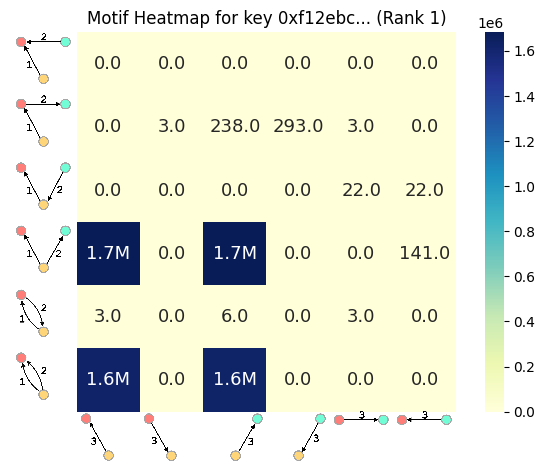

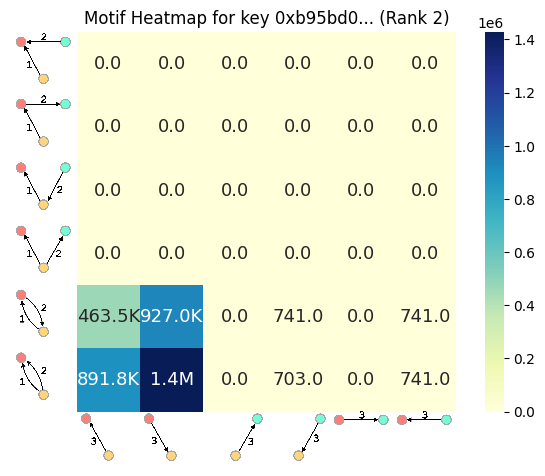

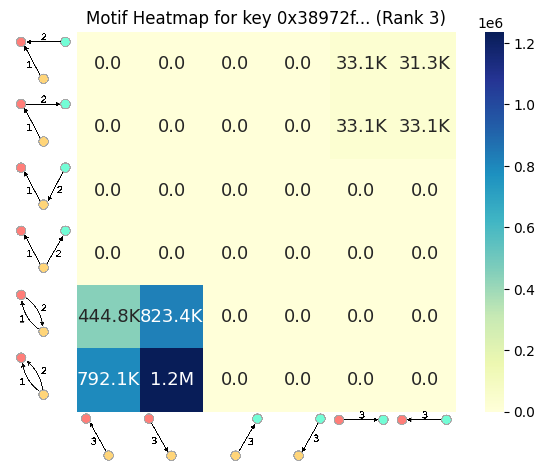

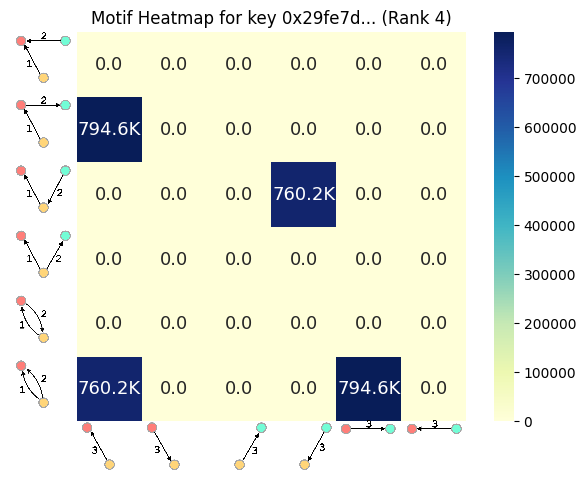

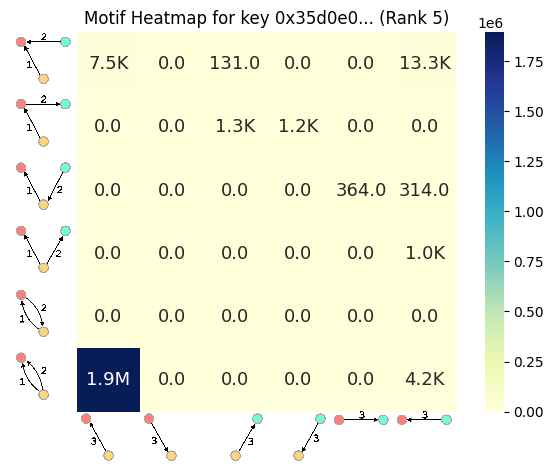

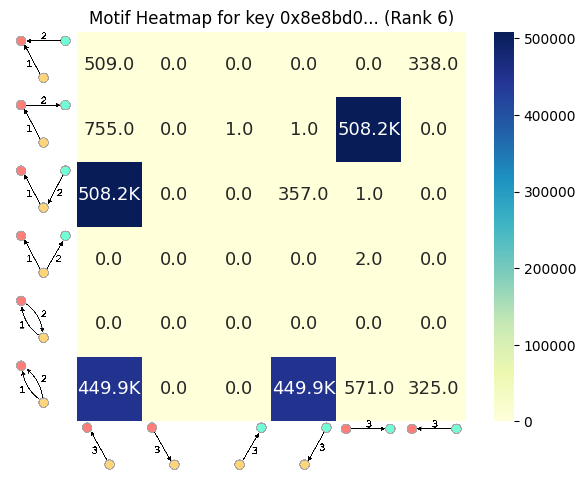

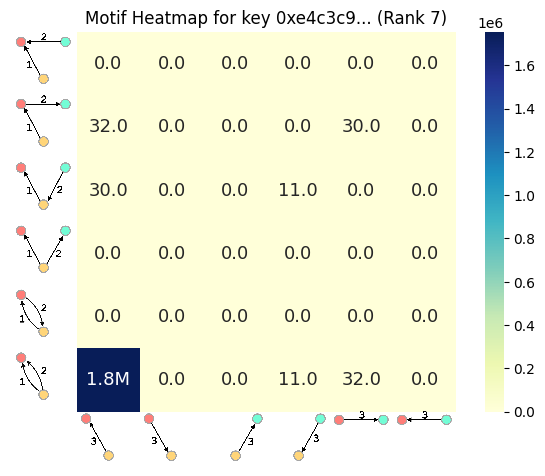

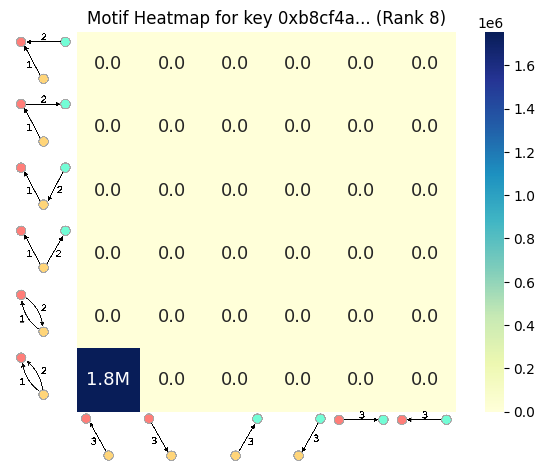

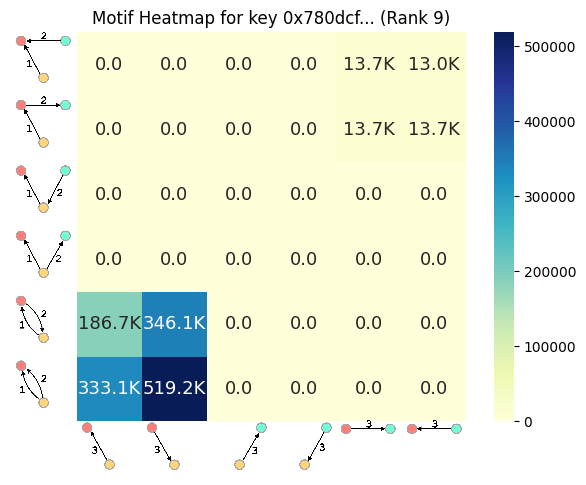

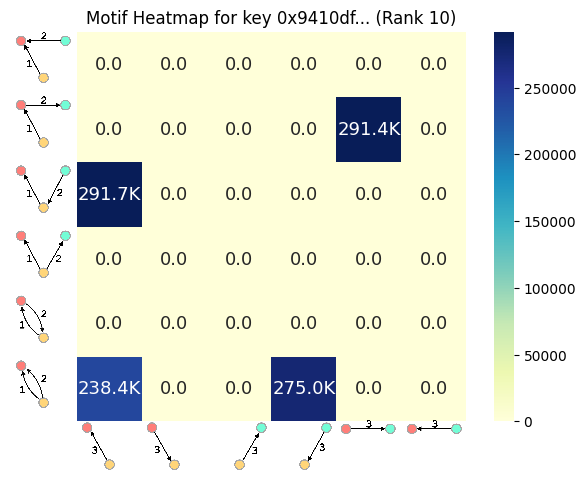

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from raphtory import plottingutils


# 提取前 10 个地址及其 motif 数据
top10_rows = df.iloc[:10]
top10_keys = top10_rows['address'].tolist()

# 构建 motif_dict（address -> motif array）
motif_dict = {
    row['address']: row[1:].to_numpy() for _, row in top10_rows.iterrows()
}

# 遍历绘图
for idx, key in enumerate(top10_keys):
    motif_array = motif_dict[key].copy()

    # 合并方向相反的 motif（25~28 合并到 32,31,31,29）
    motif_array[31] += motif_array[24]
    motif_array[30] += motif_array[25]
    motif_array[30] += motif_array[26]
    motif_array[28] += motif_array[27]

    # 绘图
    fig, ax = plt.subplots()
    ax = plottingutils.global_motif_heatplot(motif_array, cmap="YlGnBu")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='x', labelsize=10, pad=10)
    ax.set_title(f"Motif Heatmap for key {key[:8]}... (Rank {idx+1})")
    plt.savefig(f"motif_heatmap_rank_all{idx+1}_{key[:8]}.png")
    plt.show()



In [7]:
sum_list = []

for key, arr in motif_dict.items():
    total = sum(arr)  # 直接对 list 求和
    sum_list.append((key, total))

# 按总和排序并取前10个
sum_list_sorted = sorted(sum_list, key=lambda x: x[1], reverse=True)
top10_keys = [k for k, _ in sum_list_sorted[:10]]

# 打印 top10 对应的列表
for k in top10_keys:
    print(f"Key: {k}")
    print(motif_dict[k])
    print("=" * 40)


Key: 0xf12ebcb7d7f8b22d629df78fe9f08a0c1e8a4fe1
[0 0 0 3 0 6 0 1625415 0 0 0 3 0 0 0 1682637 0 0 0 3 0 0 0 1681850 0 0 0 0
 0 3 0 1621056 0 22 238 0 0 22 293 141]
Key: 0xb95bd0793bcc5524af358ffaae3e38c3903c7626
[741 0 741 0 741 0 703 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 463485 463485
 500574 463485 463485 463485 463485 428325 0 0 0 0 0 0 0 0]
Key: 0x38972f4bc20dbf2eb2a4cb0593414e7f1bc73c2d
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 31337 33068 33068 33068 0 0 0 0 380369
 411706 411706 411706 411706 444774 411706 411706 0 0 0 0 0 0 0 0]
Key: 0x29fe7d60ddf151e5b52e5fab4f1325da6b2bd958
[0 794561 0 0 0 0 0 0 0 0 794561 0 0 0 0 0 0 0 0 0 760216 0 0 0 760216 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Key: 0x35d0e078755cd84d3e0656caab417dee1d7939c7
[4160 0 0 0 0 0 0 0 7491 0 0 0 0 0 0 0 13316 0 0 0 0 0 0 0 1894421 0 0 0 0
 0 0 0 131 364 1344 0 0 314 1227 1034]
Key: 0x8e8bd01b5a9eb272cc3892a2e40e64a716aa2a40
[325 571 0 0 0 0 449923 0 509 0 755 0 0 508185 0 0 338 0 0 508185 357 0 0
 0 19 0 0 0 0 0 0 449923 0 1 1 2 0 0

In [ ]:
import matplotlib.pyplot as plt
from raphtory import algorithms, plottingutils

# 创建画布并绘图
fig, ax = plt.subplots(figsize=(6, 6))
ax = plottingutils.global_motif_heatplot(motif_array, ax=ax, cmap="YlGnBu")  # 加入 colormap 可选项
ax.set_title("Motif Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from raphtory import plottingutils

sum_list = []

for key, arr in motif_dict.items():
    total = sum(arr)
    sum_list.append((key, total))

sum_list_sorted = sorted(sum_list, key=lambda x: x[1], reverse=True)
top10_keys = [k for k, _ in sum_list_sorted[:10]]

for idx, key in enumerate(top10_keys):
    motif_array = motif_dict[key].copy()  # 复制，避免修改原始数据

    # 合并方向相反的 motif（36~39 到 0~3）
    ordered_motif_array[31] += ordered_motif_array[24]  # motif_25 合并到 motif_32
    ordered_motif_array[30] += ordered_motif_array[25]  # motif_26 合并到 motif_31
    ordered_motif_array[29] += ordered_motif_array[26]  # motif_27 合并到 motif_31（双重合并）
    ordered_motif_array[28] += ordered_motif_array[27]  # motif_28 合并到 motif_29

    # 不截断数组，保留完整 40 维，用于绘图
    fig, ax = plt.subplots()
    ax = plottingutils.global_motif_heatplot(motif_array, cmap="YlGnBu")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # 移动 x 轴刻度标签向下
    ax.tick_params(axis='x', labelsize=10, pad=10)  # pad 设置距离，单位为点（pt）

    ax.set_title(f"Motif Heatmap for key {key[:8]}... (Rank {idx+1})")
    plt.savefig(f"motif_heatmap_rank_all{idx+1}_{key[:8]}.png")
    plt.show()



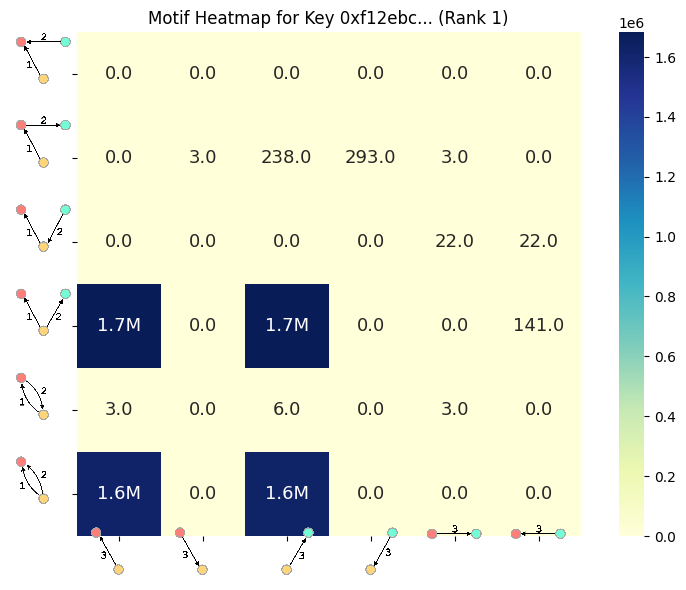

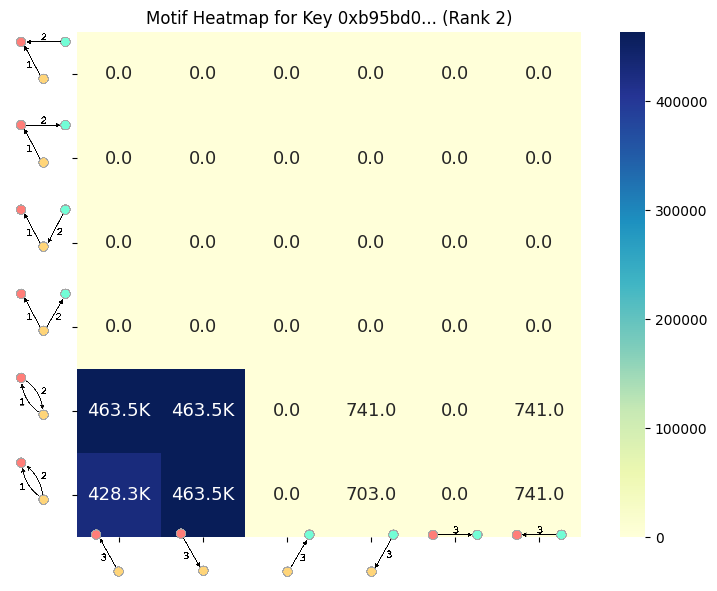

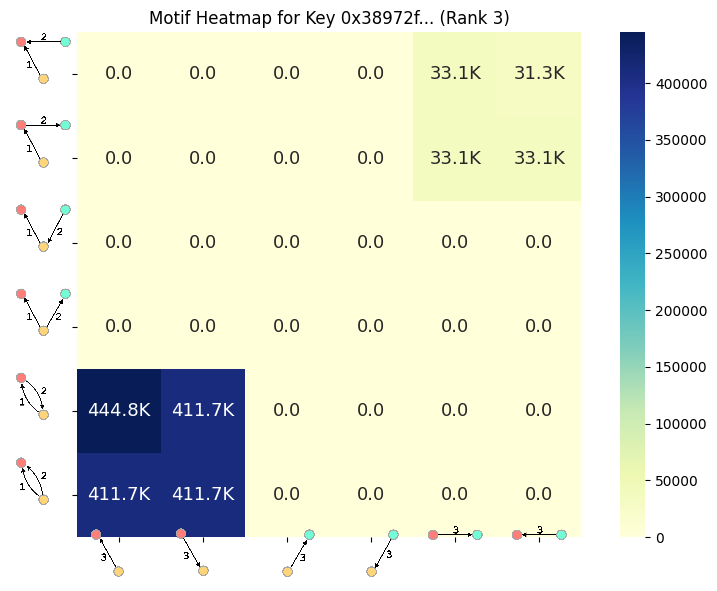

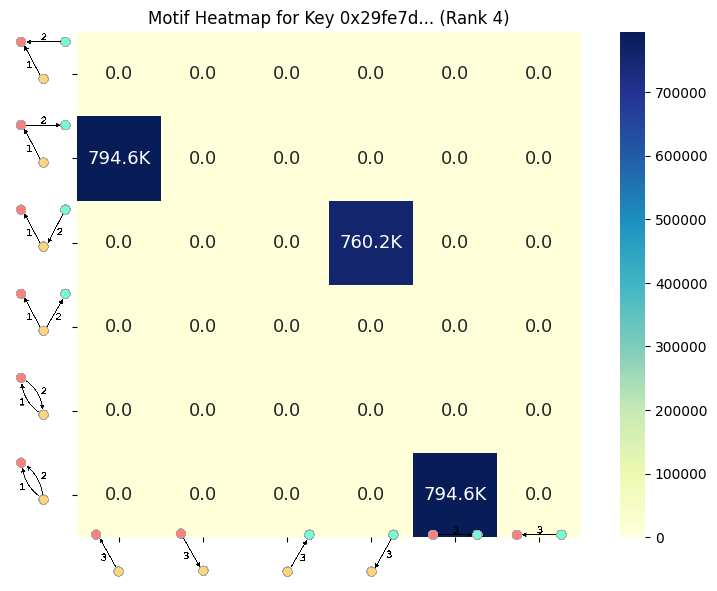

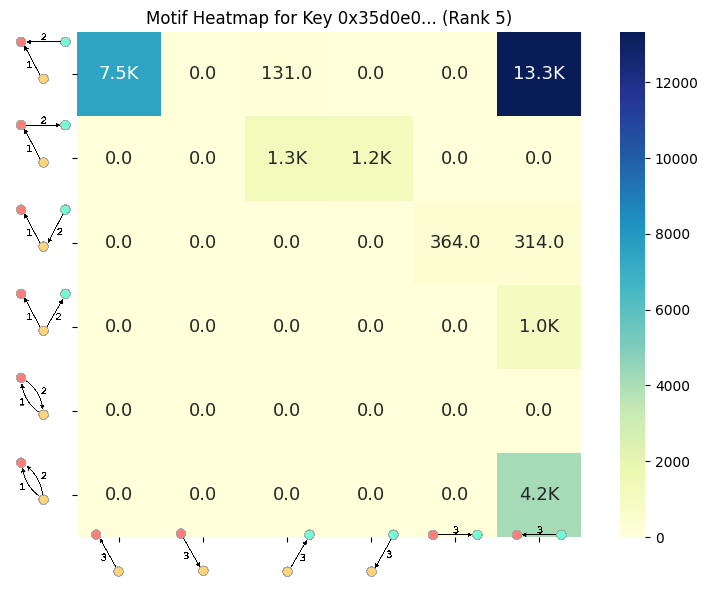

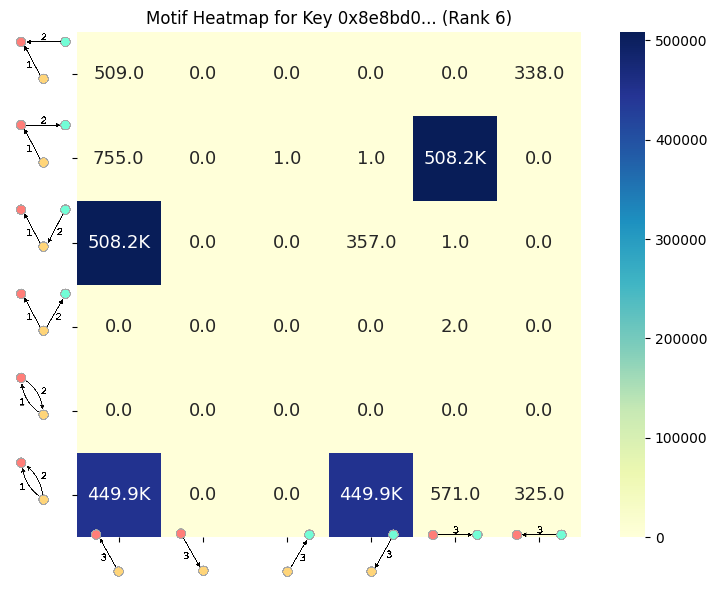

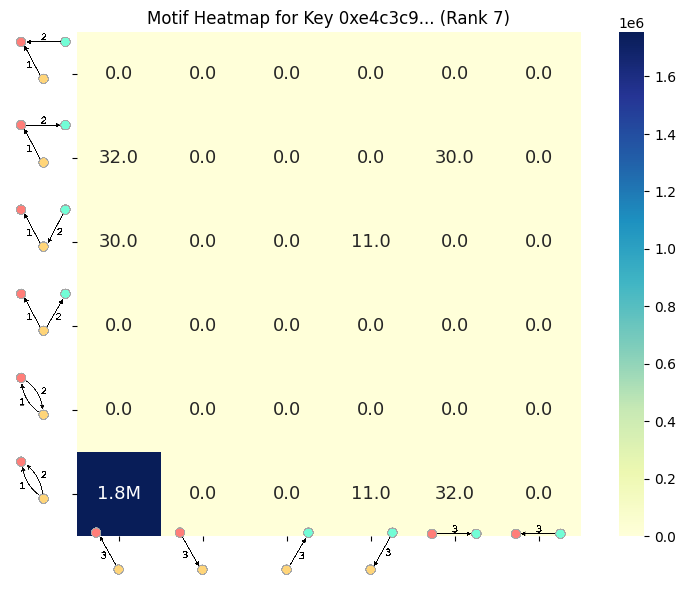

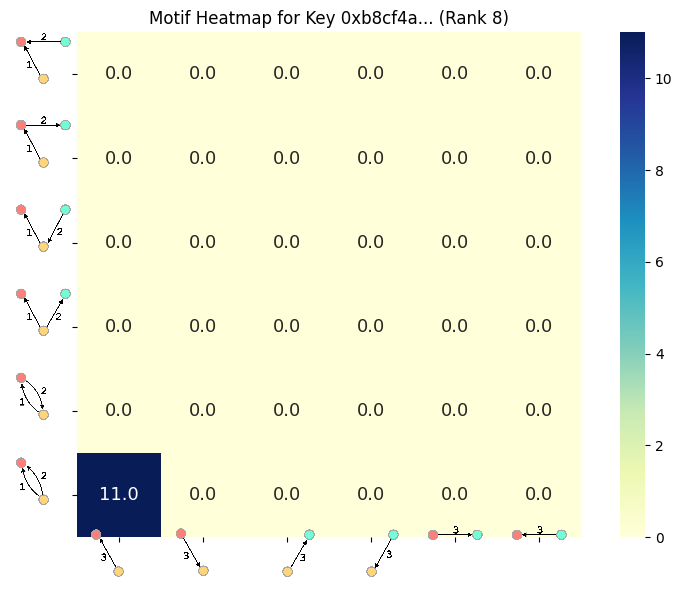

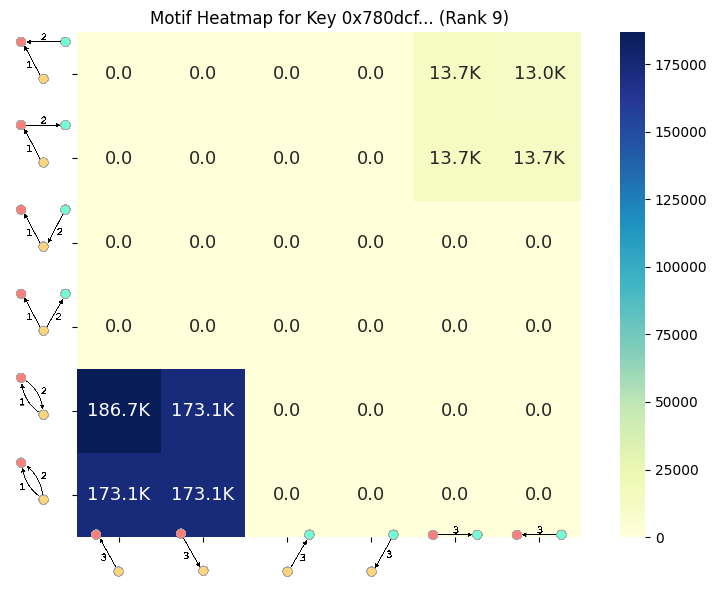

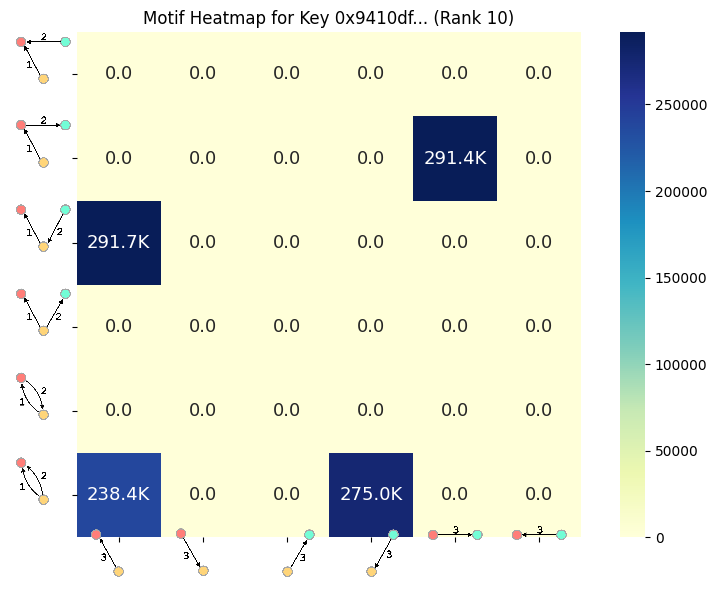

In [10]:
import matplotlib.pyplot as plt
from raphtory import plottingutils

# 假设你已经拿到了 top10_keys 列表
for idx, key in enumerate(top10_keys):
    motif_array = motif_dict[key]  # 获取该地址的 motif 分布

    fig, ax = plt.subplots(figsize=(8, 6))  # 可以调整大小
    ax = plottingutils.global_motif_heatplot(motif_array, cmap="YlGnBu")  # 画图
    ax.set_title(f"Motif Heatmap for Key {key[:8]}... (Rank {idx+1})")  # 只显示地址前缀
    plt.tight_layout()

    # 保存图像
    plt.savefig(f"motif_heatmap_rank_all{idx+1}_{key[:8]}.png")
    plt.show()